# Analysis with the rest feature

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df=pd.read_csv("../data/games_mongodump.csv")
df.head(5)

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,259200000,84600000
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,174600000,86400000
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,351000000,347400000
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,172800000,171000000
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,172800000,178200000


In [7]:
# Label data
y = pd.DataFrame(df["score_home"]>df["score_away"],index=np.arange(len(df["score_home"])),columns=["home_wins"])
X = df.join(y)
X.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,259200000,84600000,True
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,174600000,86400000,True
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,351000000,347400000,True
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,172800000,171000000,True
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,172800000,178200000,True


In [8]:
# Generate Train and Test set
X = X.reindex(np.random.permutation(X.index))
m = np.ceil(len(X)*0.7)
X_train = X.iloc[0:m]
X_test = X.iloc[m:len(X)]
X_train.head()

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: slice indexers when using iloc should be integers and not floating point
/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: slice indexers when using iloc should be integers and not floating point


,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
8279,2008-10-24T04:00:00.000Z,Sacramento Kings,Houston Rockets,2.34,1.600000,97,110,False,259200000,NaN,False
8014,2009-01-29T02:00:00.000Z,Indiana Pacers,Milwaukee Bucks,1.38,3.150000,107,99,False,685800000,766800000,True
7863,2009-02-21T03:30:00.000Z,Chicago Bulls,Denver Nuggets,2.11,1.750000,116,99,False,174600000,178200000,True
7506,2009-03-30T03:00:00.000Z,Sacramento Kings,Phoenix Suns,2.99,1.380228,126,118,False,169200000,86400000,True
3504,2012-12-27T03:00:00.000Z,Memphis Grizzlies,Philadelphia 76ers,1.21,4.690000,89,99,False,345600000,277200000,False


In [9]:
# Feature Scaling
def apply_feature_scaling(X_j):
    return (X_j - np.mean(X_j))/(np.max(X_j)-np.min(X_j))
def feature_scale(X,x_array):
    for x_i in x_array:
        X[x_i]=apply_feature_scaling(X[x_i]);

In [11]:
feature_scale(X_train,['odd_home','odd_away','rest_time_home','rest_time_away']);
X_train.head()

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
8279,2008-10-24T04:00:00.000Z,Sacramento Kings,Houston Rockets,0.029174,-0.078319,97,110,False,-0.006568,NaN,False
8014,2009-01-29T02:00:00.000Z,Indiana Pacers,Milwaukee Bucks,-0.029976,-0.009154,107,99,False,0.013027,0.017427,True
7863,2009-02-21T03:30:00.000Z,Chicago Bulls,Denver Nuggets,0.015003,-0.071626,116,99,False,-0.010454,-0.009493,True
7506,2009-03-30T03:00:00.000Z,Sacramento Kings,Phoenix Suns,0.069223,-0.088126,126,118,False,-0.010702,-0.013692,True
3504,2012-12-27T03:00:00.000Z,Memphis Grizzlies,Philadelphia 76ers,-0.040450,0.059566,89,99,False,-0.002600,-0.004965,False


In [17]:
# Clean NaN Values 
def clean_nan(X):
    return X.fillna(0)

In [18]:
X_train_map = clean_nan(X_train);
X_test_map = clean_nan(X_test);

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [19]:
fit_features = ['odd_home','odd_away','rest_time_home', 'rest_time_away']
X = X_train_map[fit_features]
y = X_train_map['home_wins']
classifier.fit(X ,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
X_test_map.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
1345,2014-10-31T03:00:00.000Z,Minnesota Timberwolves,Detroit Pistons,1.46,2.800000,97,91,False,90000000,86400000,True
1089,2014-11-28T20:00:00.000Z,Boston Celtics,Chicago Bulls,2.38,1.610000,102,109,False,414000000,230400000,False
4459,2012-02-20T03:00:00.000Z,Oklahoma City Thunder,Denver Nuggets,1.24,4.220000,124,118,True,172800000,172800000,True
67,2015-04-02T01:30:00.000Z,Detroit Pistons,Atlanta Hawks,2.12,1.757576,105,95,False,264600000,86400000,True
6216,2010-10-17T02:00:00.000Z,Memphis Grizzlies,Milwaukee Bucks,1.38,3.010000,91,77,False,345600000,90000000,True


In [23]:
feature_scale(X_test_map,['odd_home','odd_away','rest_time_home','rest_time_away']);
X_test_map.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
1345,2014-10-31T03:00:00.000Z,Minnesota Timberwolves,Detroit Pistons,-0.029302,-0.028168,97,91,False,-0.011540,-0.009951,True
1089,2014-11-28T20:00:00.000Z,Boston Celtics,Chicago Bulls,0.036178,-0.090668,102,109,False,0.003339,-0.003338,False
4459,2012-02-20T03:00:00.000Z,Oklahoma City Thunder,Denver Nuggets,-0.044961,0.046412,124,118,True,-0.007738,-0.005983,True
67,2015-04-02T01:30:00.000Z,Detroit Pistons,Atlanta Hawks,0.017673,-0.082917,105,95,False,-0.003522,-0.009951,True
6216,2010-10-17T02:00:00.000Z,Memphis Grizzlies,Milwaukee Bucks,-0.034996,-0.017139,91,77,False,0.000198,-0.009786,True


In [22]:
X = X_test_map[fit_features]
y = X_test_map['home_wins']
classifier.score(X,y)

0.70413488558811721

In [24]:
X_train.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
8279,2008-10-24T04:00:00.000Z,Sacramento Kings,Houston Rockets,0.029174,-0.078319,97,110,False,-0.006568,NaN,False
8014,2009-01-29T02:00:00.000Z,Indiana Pacers,Milwaukee Bucks,-0.029976,-0.009154,107,99,False,0.013027,0.017427,True
7863,2009-02-21T03:30:00.000Z,Chicago Bulls,Denver Nuggets,0.015003,-0.071626,116,99,False,-0.010454,-0.009493,True
7506,2009-03-30T03:00:00.000Z,Sacramento Kings,Phoenix Suns,0.069223,-0.088126,126,118,False,-0.010702,-0.013692,True
3504,2012-12-27T03:00:00.000Z,Memphis Grizzlies,Philadelphia 76ers,-0.040450,0.059566,89,99,False,-0.002600,-0.004965,False


# fred

In [28]:
y = pd.DataFrame(df["score_home"]>df["score_away"],index=np.arange(len(df["score_home"])),columns=["home_wins"])
X = df.join(y)
X.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,259200000,84600000,True
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,174600000,86400000,True
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,351000000,347400000,True
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,172800000,171000000,True
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,172800000,178200000,True


In [29]:
mmm_in_a_day = 24 * 60 * 60 * 1000
X["rest_time_home"] = X["rest_time_home"]/mmm_in_a_day
X["rest_time_away"] = X["rest_time_away"]/mmm_in_a_day
X.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,3.000000,0.979167,True
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,2.020833,1.000000,True
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,4.062500,4.020833,True
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,2.000000,1.979167,True
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,2.000000,2.062500,True


In [30]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [33]:
def plot_feature_space(X,x1,x2):
    plt.scatter(X[x1][X['home_wins']==True],X[x2][X['home_wins']==True],color='g',alpha=.5)
    plt.scatter(X[x1][X['home_wins']==False],X[x2][X['home_wins']==False],color='r',alpha=.5)
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.grid(True)
    plt.xlim([0,25])
    plt.ylim([0,25])
#     plt.axis('equal')
    remove_border()

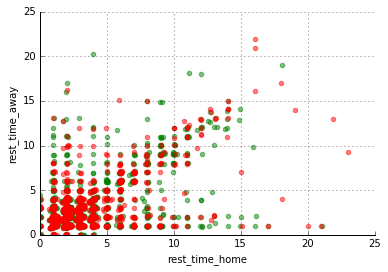

In [34]:
plot_feature_space(X,'rest_time_home','rest_time_away')

In [35]:
X.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,home_wins
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,3.000000,0.979167,True
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,2.020833,1.000000,True
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,4.062500,4.020833,True
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,2.000000,1.979167,True
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,2.000000,2.062500,True
